In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.models import vgg16, VGG16_Weights
from torchvision.transforms import ToTensor, ToPILImage

from PIL import Image

from model import *
from train import *

# Load images and vgg

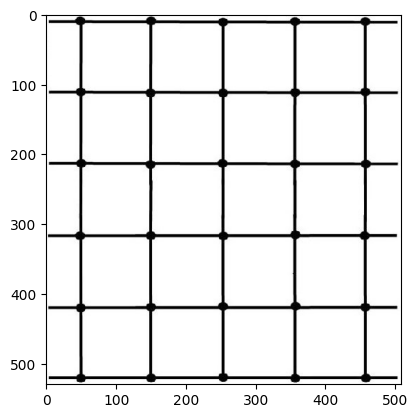

In [2]:
imgPIL_texture =  plt.imread('grid_0008.jpg')
imgPIL_noise = plt.imread('noise.jpg')

plt.imshow(imgPIL_texture)

In [3]:
vggnet_features, preprocess = load_vggnet_features()

/Users/seginus/Library/Python/3.10/lib/python/site-packages/torchvision/transforms/functional.py:149: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:205.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


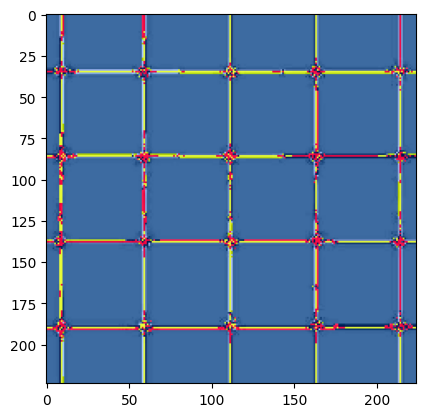

In [4]:
img = torch.stack((preprocess(ToTensor()(imgPIL_texture)),
                   preprocess(ToTensor()(imgPIL_noise))))
imgPIL = ToPILImage()(img[0])
plt.imshow(imgPIL)

# Test model.py functions

In [5]:
automaton = CAutomaton()
set_perception_kernels(automaton)
print(automaton)

CAutomaton(
  (perception_filter): Conv2d(12, 48, kernel_size=(3, 3), stride=(1, 1), bias=False, padding_mode=circular)
  (update_rule): Sequential(
    (0): Conv2d(48, 96, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(96, 12, kernel_size=(1, 1), stride=(1, 1))
  )
)


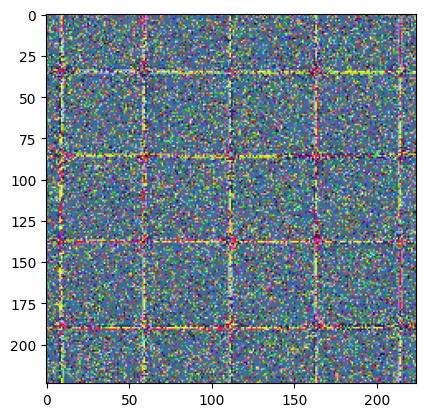

In [14]:
b, c, h, w = img.shape
states = torch.cat((img, torch.rand(b, 9, h, w)), dim=1)

for i in range(2):
    plt.imshow(ToPILImage()(states[0, :3, :, :]))
    states = automaton(states)

# Test train.py functions

In [14]:
print(vggnet_features(img).shape)

torch.Size([2, 512, 7, 7])


In [15]:
gram_features = compute_texture_features(img, vggnet_features, preprocess)
print(gram_features.shape)

torch.Size([2, 5, 64, 64])
